In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# checking for class imbalance by counting the instances of each class
def count_images(path):
    plant_counts = {}
    for plant in os.listdir(path):
        plant_path = os.path.join(path, plant)
        if os.path.isdir(plant_path):
            total_count = 0
            has_subfolders = any(
                os.path.isdir(os.path.join(plant_path, f)) for f in os.listdir(plant_path)
            )
            
            if has_subfolders:
                for condition in os.listdir(plant_path):
                    condition_path = os.path.join(plant_path, condition)
                    if os.path.isdir(condition_path):
                        count = len([
                            f for f in os.listdir(condition_path)
                            if f.lower().endswith(('.jpg'))
                        ])
                        total_count += count
                        
            else:
                total_count = len([
                    f for f in os.listdir(plant_path)
                    if f.lower().endswith(('.jpg'))
                ])
            plant_counts[plant] = total_count
    return plant_counts

In [23]:
dataset_path = r'C:\Users\fadwa\Desktop\Diploma Project\plantvillage dataset\grayscale'

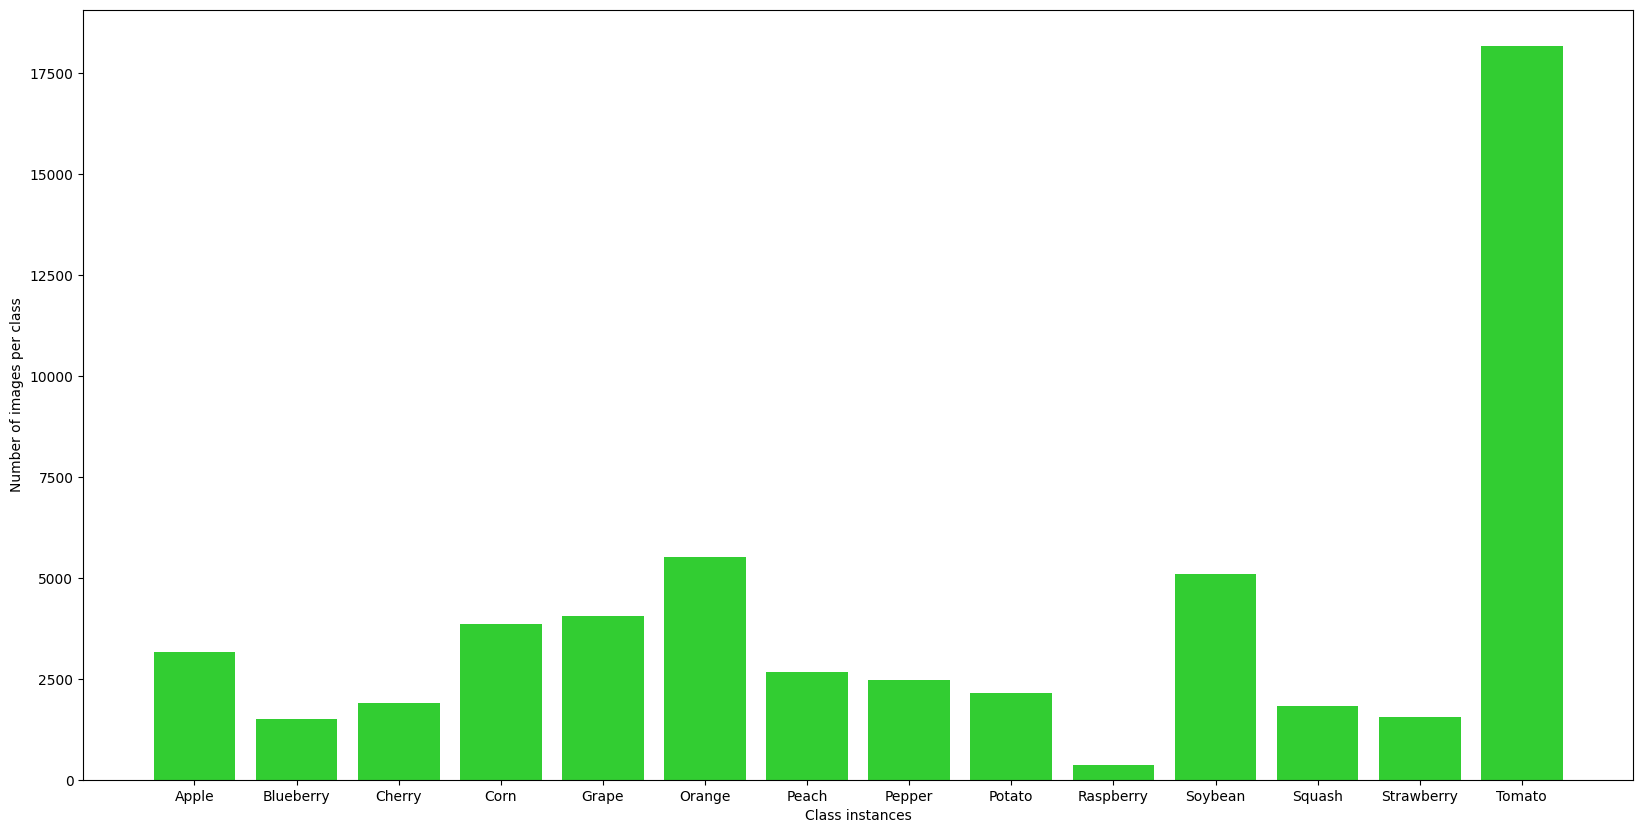

In [30]:
plt.figure(figsize=(20,10))
plt.bar(count_images(dataset_path).keys(), count_images(dataset_path).values(), color='limegreen')
plt.xlabel('Class instances')
plt.ylabel('Number of images per class')
plt.show()